In [69]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import netCDF4
import h5py
import datetime as dt
from datetime import datetime
import pyproj

from tqdm import tqdm


from pyproj import Proj, transform
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import torch

from scipy.interpolate import griddata

import cdsapi
import xarray as xr
from urllib.request import urlopen

from urllib.request import urlretrieve

import pickle

%reload_ext autoreload
%autoreload 2

from functions import *
# from torch_model import *

In [71]:
sector = "Weddell"

for year in [2019, 2020, 2021, 2022]:
    xx, yy, inputs, outputs = make_dataset(year, sector)
    
    a = [xx, yy, inputs, outputs]
    
    with open(f'D:\\IS2_topo_DL\\data\\Data_{sector}_{year}.pkl', 'wb') as handle:
        pickle.dump(a, handle)

0 2019-01-01 12:00:00 2019-01-08 12:00:00


2024-07-23 13:04:16,028 INFO Welcome to the CDS
2024-07-23 13:04:16,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:04:16,358 INFO Request is completed


1 2019-01-08 12:00:00 2019-01-15 12:00:00


2024-07-23 13:04:39,286 INFO Welcome to the CDS
2024-07-23 13:04:39,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:04:39,601 INFO Request is completed


2 2019-01-15 12:00:00 2019-01-22 12:00:00


2024-07-23 13:05:00,735 INFO Welcome to the CDS
2024-07-23 13:05:00,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:05:01,015 INFO Request is completed


3 2019-01-22 12:00:00 2019-01-29 12:00:00


2024-07-23 13:05:19,151 INFO Welcome to the CDS
2024-07-23 13:05:19,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:05:19,459 INFO Request is completed


4 2019-01-29 12:00:00 2019-02-05 12:00:00


2024-07-23 13:05:40,150 INFO Welcome to the CDS
2024-07-23 13:05:40,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:05:40,431 INFO Request is completed


5 2019-02-05 12:00:00 2019-02-12 12:00:00


2024-07-23 13:06:01,366 INFO Welcome to the CDS
2024-07-23 13:06:01,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:06:01,765 INFO Request is completed


6 2019-02-12 12:00:00 2019-02-19 12:00:00


2024-07-23 13:06:20,945 INFO Welcome to the CDS
2024-07-23 13:06:20,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:06:21,306 INFO Request is completed


7 2019-02-19 12:00:00 2019-02-26 12:00:00


2024-07-23 13:06:38,474 INFO Welcome to the CDS
2024-07-23 13:06:38,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:06:38,771 INFO Request is completed


8 2019-02-26 12:00:00 2019-03-05 12:00:00


2024-07-23 13:06:56,284 INFO Welcome to the CDS
2024-07-23 13:06:56,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:06:56,593 INFO Request is completed


9 2019-03-05 12:00:00 2019-03-12 12:00:00


2024-07-23 13:07:13,186 INFO Welcome to the CDS
2024-07-23 13:07:13,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:07:13,504 INFO Request is completed


10 2019-03-12 12:00:00 2019-03-19 12:00:00


2024-07-23 13:07:31,038 INFO Welcome to the CDS
2024-07-23 13:07:31,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:07:31,422 INFO Request is completed


11 2019-03-19 12:00:00 2019-03-26 12:00:00


2024-07-23 13:07:50,004 INFO Welcome to the CDS
2024-07-23 13:07:50,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:07:50,314 INFO Request is completed


12 2019-03-26 12:00:00 2019-04-02 12:00:00


2024-07-23 13:08:08,309 INFO Welcome to the CDS
2024-07-23 13:08:08,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:08:08,671 INFO Request is completed


13 2019-04-02 12:00:00 2019-04-09 12:00:00


2024-07-23 13:08:32,746 INFO Welcome to the CDS
2024-07-23 13:08:32,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:08:33,108 INFO Request is completed


14 2019-04-09 12:00:00 2019-04-16 12:00:00


2024-07-23 13:08:52,616 INFO Welcome to the CDS
2024-07-23 13:08:52,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:08:52,914 INFO Request is completed


15 2019-04-16 12:00:00 2019-04-23 12:00:00


2024-07-23 13:09:10,139 INFO Welcome to the CDS
2024-07-23 13:09:10,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:09:10,517 INFO Request is completed


16 2019-04-23 12:00:00 2019-04-30 12:00:00


2024-07-23 13:09:29,547 INFO Welcome to the CDS
2024-07-23 13:09:29,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:09:29,819 INFO Request is completed


17 2019-04-30 12:00:00 2019-05-07 12:00:00


2024-07-23 13:09:47,906 INFO Welcome to the CDS
2024-07-23 13:09:47,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:09:48,225 INFO Request is completed


18 2019-05-07 12:00:00 2019-05-14 12:00:00


2024-07-23 13:10:12,723 INFO Welcome to the CDS
2024-07-23 13:10:12,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:10:13,012 INFO Request is completed


19 2019-05-14 12:00:00 2019-05-21 12:00:00


2024-07-23 13:10:30,603 INFO Welcome to the CDS
2024-07-23 13:10:30,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:10:30,901 INFO Request is completed


20 2019-05-21 12:00:00 2019-05-28 12:00:00


2024-07-23 13:10:49,468 INFO Welcome to the CDS
2024-07-23 13:10:49,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:10:49,753 INFO Request is completed


21 2019-05-28 12:00:00 2019-06-04 12:00:00


2024-07-23 13:11:07,700 INFO Welcome to the CDS
2024-07-23 13:11:07,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:11:08,102 INFO Request is completed


22 2019-06-04 12:00:00 2019-06-11 12:00:00


2024-07-23 13:11:26,716 INFO Welcome to the CDS
2024-07-23 13:11:26,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:11:26,979 INFO Request is completed


23 2019-06-11 12:00:00 2019-06-18 12:00:00


2024-07-23 13:11:57,147 INFO Welcome to the CDS
2024-07-23 13:11:57,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:11:57,494 INFO Request is completed


24 2019-06-18 12:00:00 2019-06-25 12:00:00


2024-07-23 13:12:21,776 INFO Welcome to the CDS
2024-07-23 13:12:21,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:12:22,173 INFO Request is completed


25 2019-06-25 12:00:00 2019-07-02 12:00:00


2024-07-23 13:12:42,613 INFO Welcome to the CDS
2024-07-23 13:12:42,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:12:42,874 INFO Request is completed
2024-07-23 13:13:02,378 INFO Welcome to the CDS
2024-07-23 13:13:02,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


26 2019-07-02 12:00:00 2019-07-09 12:00:00


2024-07-23 13:13:03,278 INFO Request is completed
2024-07-23 13:13:20,302 INFO Welcome to the CDS
2024-07-23 13:13:20,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


27 2019-07-09 12:00:00 2019-07-16 12:00:00


2024-07-23 13:13:20,669 INFO Request is completed
2024-07-23 13:13:37,306 INFO Welcome to the CDS
2024-07-23 13:13:37,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


28 2019-07-16 12:00:00 2019-07-23 12:00:00


2024-07-23 13:13:37,652 INFO Request is completed


29 2019-07-23 12:00:00 2019-07-30 12:00:00


2024-07-23 13:13:56,388 INFO Welcome to the CDS
2024-07-23 13:13:56,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:13:56,732 INFO Request is completed


30 2019-07-30 12:00:00 2019-08-06 12:00:00


2024-07-23 13:14:16,516 INFO Welcome to the CDS
2024-07-23 13:14:16,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:14:16,923 INFO Request is completed


31 2019-08-06 12:00:00 2019-08-13 12:00:00


2024-07-23 13:14:34,848 INFO Welcome to the CDS
2024-07-23 13:14:34,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:14:35,205 INFO Request is completed


32 2019-08-13 12:00:00 2019-08-20 12:00:00


2024-07-23 13:14:55,429 INFO Welcome to the CDS
2024-07-23 13:14:55,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:14:55,761 INFO Request is completed


33 2019-08-20 12:00:00 2019-08-27 12:00:00


2024-07-23 13:15:16,884 INFO Welcome to the CDS
2024-07-23 13:15:16,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:15:17,792 INFO Request is completed


34 2019-08-27 12:00:00 2019-09-03 12:00:00


2024-07-23 13:15:35,399 INFO Welcome to the CDS
2024-07-23 13:15:35,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:15:35,637 INFO Request is completed


35 2019-09-03 12:00:00 2019-09-10 12:00:00


2024-07-23 13:15:58,800 INFO Welcome to the CDS
2024-07-23 13:15:58,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:15:59,410 INFO Request is completed


36 2019-09-10 12:00:00 2019-09-17 12:00:00


2024-07-23 13:16:17,131 INFO Welcome to the CDS
2024-07-23 13:16:17,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:16:17,552 INFO Request is completed


37 2019-09-17 12:00:00 2019-09-24 12:00:00


2024-07-23 13:16:36,153 INFO Welcome to the CDS
2024-07-23 13:16:36,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:16:36,399 INFO Request is completed


38 2019-09-24 12:00:00 2019-10-01 12:00:00


2024-07-23 13:16:57,141 INFO Welcome to the CDS
2024-07-23 13:16:57,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:16:57,541 INFO Request is completed


39 2019-10-01 12:00:00 2019-10-08 12:00:00


2024-07-23 13:17:18,443 INFO Welcome to the CDS
2024-07-23 13:17:18,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:17:18,767 INFO Request is completed


40 2019-10-08 12:00:00 2019-10-15 12:00:00


2024-07-23 13:17:39,976 INFO Welcome to the CDS
2024-07-23 13:17:39,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:17:40,246 INFO Request is completed


41 2019-10-15 12:00:00 2019-10-22 12:00:00


2024-07-23 13:18:02,705 INFO Welcome to the CDS
2024-07-23 13:18:02,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:18:03,353 INFO Request is completed


42 2019-10-22 12:00:00 2019-10-29 12:00:00


2024-07-23 13:18:24,032 INFO Welcome to the CDS
2024-07-23 13:18:24,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:18:24,354 INFO Request is completed


43 2019-10-29 12:00:00 2019-11-05 12:00:00


2024-07-23 13:18:41,396 INFO Welcome to the CDS
2024-07-23 13:18:41,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:18:41,686 INFO Request is completed


44 2019-11-05 12:00:00 2019-11-12 12:00:00


2024-07-23 13:19:03,820 INFO Welcome to the CDS
2024-07-23 13:19:03,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:19:04,248 INFO Request is completed


45 2019-11-12 12:00:00 2019-11-19 12:00:00


2024-07-23 13:19:22,805 INFO Welcome to the CDS
2024-07-23 13:19:22,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:19:23,161 INFO Request is completed


46 2019-11-19 12:00:00 2019-11-26 12:00:00


2024-07-23 13:19:40,779 INFO Welcome to the CDS
2024-07-23 13:19:40,779 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:19:41,067 INFO Request is completed


47 2019-11-26 12:00:00 2019-12-03 12:00:00


2024-07-23 13:19:57,009 INFO Welcome to the CDS
2024-07-23 13:19:57,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:19:57,413 INFO Request is completed


48 2019-12-03 12:00:00 2019-12-10 12:00:00


2024-07-23 13:20:13,623 INFO Welcome to the CDS
2024-07-23 13:20:13,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:20:13,865 INFO Request is completed


49 2019-12-10 12:00:00 2019-12-17 12:00:00


2024-07-23 13:20:29,709 INFO Welcome to the CDS
2024-07-23 13:20:29,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:20:29,938 INFO Request is completed


50 2019-12-17 12:00:00 2019-12-24 12:00:00


2024-07-23 13:20:49,933 INFO Welcome to the CDS
2024-07-23 13:20:49,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:20:50,417 INFO Request is completed


51 2019-12-24 12:00:00 2019-12-31 12:00:00


2024-07-23 13:21:07,742 INFO Welcome to the CDS
2024-07-23 13:21:07,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:21:08,114 INFO Request is completed


0 2020-01-01 12:00:00 2020-01-08 12:00:00


2024-07-23 13:21:27,445 INFO Welcome to the CDS
2024-07-23 13:21:27,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:21:27,758 INFO Request is completed


1 2020-01-08 12:00:00 2020-01-15 12:00:00


2024-07-23 13:21:46,169 INFO Welcome to the CDS
2024-07-23 13:21:46,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:21:46,448 INFO Request is completed


2 2020-01-15 12:00:00 2020-01-22 12:00:00


2024-07-23 13:22:03,349 INFO Welcome to the CDS
2024-07-23 13:22:03,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:22:03,600 INFO Request is completed


3 2020-01-22 12:00:00 2020-01-29 12:00:00


2024-07-23 13:22:23,384 INFO Welcome to the CDS
2024-07-23 13:22:23,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:22:23,812 INFO Request is completed


4 2020-01-29 12:00:00 2020-02-05 12:00:00


2024-07-23 13:22:43,842 INFO Welcome to the CDS
2024-07-23 13:22:43,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:22:44,110 INFO Request is completed


5 2020-02-05 12:00:00 2020-02-12 12:00:00


2024-07-23 13:23:07,400 INFO Welcome to the CDS
2024-07-23 13:23:07,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:23:07,708 INFO Request is completed


6 2020-02-12 12:00:00 2020-02-19 12:00:00


2024-07-23 13:23:25,857 INFO Welcome to the CDS
2024-07-23 13:23:25,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:23:26,158 INFO Request is completed


7 2020-02-19 12:00:00 2020-02-26 12:00:00


2024-07-23 13:23:44,561 INFO Welcome to the CDS
2024-07-23 13:23:44,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:23:44,837 INFO Request is completed


8 2020-02-26 12:00:00 2020-03-04 12:00:00


2024-07-23 13:24:03,036 INFO Welcome to the CDS
2024-07-23 13:24:03,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:24:03,286 INFO Request is completed


9 2020-03-04 12:00:00 2020-03-11 12:00:00


2024-07-23 13:24:24,050 INFO Welcome to the CDS
2024-07-23 13:24:24,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:24:24,367 INFO Request is completed


10 2020-03-11 12:00:00 2020-03-18 12:00:00


2024-07-23 13:24:44,321 INFO Welcome to the CDS
2024-07-23 13:24:44,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:24:44,563 INFO Request is completed


11 2020-03-18 12:00:00 2020-03-25 12:00:00


2024-07-23 13:25:05,581 INFO Welcome to the CDS
2024-07-23 13:25:05,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:25:05,888 INFO Request is completed


12 2020-03-25 12:00:00 2020-04-01 12:00:00


2024-07-23 13:25:23,474 INFO Welcome to the CDS
2024-07-23 13:25:23,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:25:23,761 INFO Request is completed


13 2020-04-01 12:00:00 2020-04-08 12:00:00


2024-07-23 13:25:46,380 INFO Welcome to the CDS
2024-07-23 13:25:46,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:25:46,740 INFO Request is completed


14 2020-04-08 12:00:00 2020-04-15 12:00:00


2024-07-23 13:26:03,724 INFO Welcome to the CDS
2024-07-23 13:26:03,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:26:04,028 INFO Request is completed


15 2020-04-15 12:00:00 2020-04-22 12:00:00


2024-07-23 13:26:21,771 INFO Welcome to the CDS
2024-07-23 13:26:21,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:26:22,039 INFO Request is completed


16 2020-04-22 12:00:00 2020-04-29 12:00:00


2024-07-23 13:26:42,609 INFO Welcome to the CDS
2024-07-23 13:26:42,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:26:43,004 INFO Request is completed


17 2020-04-29 12:00:00 2020-05-06 12:00:00


2024-07-23 13:27:03,283 INFO Welcome to the CDS
2024-07-23 13:27:03,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:27:03,684 INFO Request is completed


18 2020-05-06 12:00:00 2020-05-13 12:00:00


2024-07-23 13:27:21,426 INFO Welcome to the CDS
2024-07-23 13:27:21,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:27:21,742 INFO Request is completed


19 2020-05-13 12:00:00 2020-05-20 12:00:00


2024-07-23 13:27:40,936 INFO Welcome to the CDS
2024-07-23 13:27:40,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:27:41,302 INFO Request is completed


20 2020-05-20 12:00:00 2020-05-27 12:00:00


2024-07-23 13:27:59,764 INFO Welcome to the CDS
2024-07-23 13:27:59,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:28:00,148 INFO Request is completed


21 2020-05-27 12:00:00 2020-06-03 12:00:00


2024-07-23 13:28:17,434 INFO Welcome to the CDS
2024-07-23 13:28:17,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:28:17,790 INFO Request is completed


22 2020-06-03 12:00:00 2020-06-10 12:00:00


2024-07-23 13:28:35,103 INFO Welcome to the CDS
2024-07-23 13:28:35,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:28:35,511 INFO Request is completed


23 2020-06-10 12:00:00 2020-06-17 12:00:00


2024-07-23 13:28:54,336 INFO Welcome to the CDS
2024-07-23 13:28:54,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:28:54,636 INFO Request is completed


24 2020-06-17 12:00:00 2020-06-24 12:00:00


2024-07-23 13:29:15,435 INFO Welcome to the CDS
2024-07-23 13:29:15,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:29:15,769 INFO Request is completed


25 2020-06-24 12:00:00 2020-07-01 12:00:00


2024-07-23 13:29:34,734 INFO Welcome to the CDS
2024-07-23 13:29:34,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:29:35,052 INFO Request is completed


26 2020-07-01 12:00:00 2020-07-08 12:00:00


2024-07-23 13:29:56,324 INFO Welcome to the CDS
2024-07-23 13:29:56,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:29:56,601 INFO Request is completed


27 2020-07-08 12:00:00 2020-07-15 12:00:00


2024-07-23 13:30:16,735 INFO Welcome to the CDS
2024-07-23 13:30:16,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:30:17,007 INFO Request is completed


28 2020-07-15 12:00:00 2020-07-22 12:00:00


2024-07-23 13:30:40,138 INFO Welcome to the CDS
2024-07-23 13:30:40,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:30:40,372 INFO Request is completed


29 2020-07-22 12:00:00 2020-07-29 12:00:00


2024-07-23 13:31:01,458 INFO Welcome to the CDS
2024-07-23 13:31:01,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:31:01,976 INFO Request is completed


30 2020-07-29 12:00:00 2020-08-05 12:00:00


2024-07-23 13:31:22,613 INFO Welcome to the CDS
2024-07-23 13:31:22,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:31:22,922 INFO Request is completed


31 2020-08-05 12:00:00 2020-08-12 12:00:00


2024-07-23 13:31:44,963 INFO Welcome to the CDS
2024-07-23 13:31:44,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:31:45,312 INFO Request is completed


32 2020-08-12 12:00:00 2020-08-19 12:00:00


2024-07-23 13:32:03,777 INFO Welcome to the CDS
2024-07-23 13:32:03,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:32:04,068 INFO Request is completed


33 2020-08-19 12:00:00 2020-08-26 12:00:00


2024-07-23 13:32:24,171 INFO Welcome to the CDS
2024-07-23 13:32:24,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:32:24,481 INFO Request is completed


34 2020-08-26 12:00:00 2020-09-02 12:00:00


2024-07-23 13:32:42,916 INFO Welcome to the CDS
2024-07-23 13:32:42,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:32:43,197 INFO Request is completed


35 2020-09-02 12:00:00 2020-09-09 12:00:00


2024-07-23 13:33:03,929 INFO Welcome to the CDS
2024-07-23 13:33:03,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:33:04,359 INFO Request is completed


36 2020-09-09 12:00:00 2020-09-16 12:00:00


2024-07-23 13:33:24,880 INFO Welcome to the CDS
2024-07-23 13:33:24,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:33:25,194 INFO Request is completed


37 2020-09-16 12:00:00 2020-09-23 12:00:00


2024-07-23 13:33:43,510 INFO Welcome to the CDS
2024-07-23 13:33:43,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:33:43,761 INFO Request is completed


38 2020-09-23 12:00:00 2020-09-30 12:00:00


2024-07-23 13:34:02,077 INFO Welcome to the CDS
2024-07-23 13:34:02,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:34:02,538 INFO Request is completed


39 2020-09-30 12:00:00 2020-10-07 12:00:00


2024-07-23 13:34:19,907 INFO Welcome to the CDS
2024-07-23 13:34:19,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:34:20,178 INFO Request is completed


40 2020-10-07 12:00:00 2020-10-14 12:00:00


2024-07-23 13:34:44,804 INFO Welcome to the CDS
2024-07-23 13:34:44,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:34:45,199 INFO Request is completed


41 2020-10-14 12:00:00 2020-10-21 12:00:00


2024-07-23 13:35:04,482 INFO Welcome to the CDS
2024-07-23 13:35:04,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:35:04,788 INFO Request is completed


42 2020-10-21 12:00:00 2020-10-28 12:00:00


2024-07-23 13:35:21,567 INFO Welcome to the CDS
2024-07-23 13:35:21,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:35:21,764 INFO Request is completed


43 2020-10-28 12:00:00 2020-11-04 12:00:00


2024-07-23 13:35:44,542 INFO Welcome to the CDS
2024-07-23 13:35:44,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:35:44,934 INFO Request is completed


44 2020-11-04 12:00:00 2020-11-11 12:00:00


2024-07-23 13:36:03,994 INFO Welcome to the CDS
2024-07-23 13:36:03,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:36:04,277 INFO Request is completed


45 2020-11-11 12:00:00 2020-11-18 12:00:00


2024-07-23 13:36:23,894 INFO Welcome to the CDS
2024-07-23 13:36:23,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:36:24,171 INFO Request is completed


46 2020-11-18 12:00:00 2020-11-25 12:00:00


2024-07-23 13:36:46,065 INFO Welcome to the CDS
2024-07-23 13:36:46,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:36:46,327 INFO Request is completed


47 2020-11-25 12:00:00 2020-12-02 12:00:00


2024-07-23 13:37:03,887 INFO Welcome to the CDS
2024-07-23 13:37:03,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:37:04,105 INFO Request is completed


48 2020-12-02 12:00:00 2020-12-09 12:00:00


2024-07-23 13:37:26,885 INFO Welcome to the CDS
2024-07-23 13:37:26,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:37:27,129 INFO Request is completed
2024-07-23 13:37:43,702 INFO Welcome to the CDS


49 2020-12-09 12:00:00 2020-12-16 12:00:00


2024-07-23 13:37:43,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:37:43,933 INFO Request is completed
2024-07-23 13:38:00,866 INFO Welcome to the CDS


50 2020-12-16 12:00:00 2020-12-23 12:00:00


2024-07-23 13:38:00,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:38:01,428 INFO Request is completed


51 2020-12-23 12:00:00 2020-12-30 12:00:00


2024-07-23 13:38:19,429 INFO Welcome to the CDS
2024-07-23 13:38:19,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:38:19,752 INFO Request is completed


0 2021-01-01 12:00:00 2021-01-08 12:00:00


2024-07-23 13:38:43,899 INFO Welcome to the CDS
2024-07-23 13:38:43,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:38:44,183 INFO Request is completed


1 2021-01-08 12:00:00 2021-01-15 12:00:00


2024-07-23 13:39:05,573 INFO Welcome to the CDS
2024-07-23 13:39:05,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:39:06,053 INFO Request is completed


2 2021-01-15 12:00:00 2021-01-22 12:00:00


2024-07-23 13:39:24,587 INFO Welcome to the CDS
2024-07-23 13:39:24,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:39:24,910 INFO Request is completed


3 2021-01-22 12:00:00 2021-01-29 12:00:00


2024-07-23 13:39:46,839 INFO Welcome to the CDS
2024-07-23 13:39:46,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:39:47,072 INFO Request is completed


4 2021-01-29 12:00:00 2021-02-05 12:00:00


2024-07-23 13:40:03,991 INFO Welcome to the CDS
2024-07-23 13:40:03,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:40:04,238 INFO Request is completed


5 2021-02-05 12:00:00 2021-02-12 12:00:00


2024-07-23 13:40:23,082 INFO Welcome to the CDS
2024-07-23 13:40:23,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:40:23,349 INFO Request is completed


6 2021-02-12 12:00:00 2021-02-19 12:00:00


2024-07-23 13:40:44,498 INFO Welcome to the CDS
2024-07-23 13:40:44,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:40:44,801 INFO Request is completed


7 2021-02-19 12:00:00 2021-02-26 12:00:00


2024-07-23 13:41:04,658 INFO Welcome to the CDS
2024-07-23 13:41:04,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:41:04,950 INFO Request is completed


8 2021-02-26 12:00:00 2021-03-05 12:00:00


2024-07-23 13:41:23,352 INFO Welcome to the CDS
2024-07-23 13:41:23,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:41:23,624 INFO Request is completed


9 2021-03-05 12:00:00 2021-03-12 12:00:00


2024-07-23 13:41:40,558 INFO Welcome to the CDS
2024-07-23 13:41:40,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:41:40,933 INFO Request is completed


10 2021-03-12 12:00:00 2021-03-19 12:00:00


2024-07-23 13:41:58,425 INFO Welcome to the CDS
2024-07-23 13:41:58,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:41:58,647 INFO Request is completed


11 2021-03-19 12:00:00 2021-03-26 12:00:00


2024-07-23 13:42:16,107 INFO Welcome to the CDS
2024-07-23 13:42:16,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:42:16,393 INFO Request is completed


12 2021-03-26 12:00:00 2021-04-02 12:00:00


2024-07-23 13:42:37,524 INFO Welcome to the CDS
2024-07-23 13:42:37,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:42:37,783 INFO Request is completed


13 2021-04-02 12:00:00 2021-04-09 12:00:00


2024-07-23 13:43:02,238 INFO Welcome to the CDS
2024-07-23 13:43:02,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:43:02,684 INFO Request is completed


14 2021-04-09 12:00:00 2021-04-16 12:00:00


2024-07-23 13:43:24,450 INFO Welcome to the CDS
2024-07-23 13:43:24,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:43:24,800 INFO Request is completed


15 2021-04-16 12:00:00 2021-04-23 12:00:00


2024-07-23 13:43:41,802 INFO Welcome to the CDS
2024-07-23 13:43:41,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:43:42,046 INFO Request is completed


16 2021-04-23 12:00:00 2021-04-30 12:00:00


2024-07-23 13:44:00,947 INFO Welcome to the CDS
2024-07-23 13:44:00,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:44:01,192 INFO Request is completed


17 2021-04-30 12:00:00 2021-05-07 12:00:00


2024-07-23 13:44:21,845 INFO Welcome to the CDS
2024-07-23 13:44:21,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:44:22,229 INFO Request is completed


18 2021-05-07 12:00:00 2021-05-14 12:00:00


2024-07-23 13:44:40,623 INFO Welcome to the CDS
2024-07-23 13:44:40,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:44:40,948 INFO Request is completed


19 2021-05-14 12:00:00 2021-05-21 12:00:00


2024-07-23 13:45:00,173 INFO Welcome to the CDS
2024-07-23 13:45:00,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:45:00,434 INFO Request is completed


20 2021-05-21 12:00:00 2021-05-28 12:00:00


2024-07-23 13:45:21,303 INFO Welcome to the CDS
2024-07-23 13:45:21,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:45:21,575 INFO Request is completed


21 2021-05-28 12:00:00 2021-06-04 12:00:00


2024-07-23 13:45:40,173 INFO Welcome to the CDS
2024-07-23 13:45:40,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:45:40,412 INFO Request is completed


22 2021-06-04 12:00:00 2021-06-11 12:00:00


2024-07-23 13:46:01,283 INFO Welcome to the CDS
2024-07-23 13:46:01,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:46:01,565 INFO Request is completed


23 2021-06-11 12:00:00 2021-06-18 12:00:00


2024-07-23 13:46:22,859 INFO Welcome to the CDS
2024-07-23 13:46:22,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:46:23,086 INFO Request is completed


24 2021-06-18 12:00:00 2021-06-25 12:00:00


2024-07-23 13:46:42,979 INFO Welcome to the CDS
2024-07-23 13:46:42,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:46:43,296 INFO Request is completed


25 2021-06-25 12:00:00 2021-07-02 12:00:00


2024-07-23 13:47:01,738 INFO Welcome to the CDS
2024-07-23 13:47:01,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:47:02,054 INFO Request is completed


26 2021-07-02 12:00:00 2021-07-09 12:00:00


2024-07-23 13:47:25,230 INFO Welcome to the CDS
2024-07-23 13:47:25,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:47:25,560 INFO Request is completed


27 2021-07-09 12:00:00 2021-07-16 12:00:00


2024-07-23 13:47:45,641 INFO Welcome to the CDS
2024-07-23 13:47:45,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:47:45,895 INFO Request is completed


28 2021-07-16 12:00:00 2021-07-23 12:00:00


2024-07-23 13:48:08,238 INFO Welcome to the CDS
2024-07-23 13:48:08,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:48:08,499 INFO Request is completed


29 2021-07-23 12:00:00 2021-07-30 12:00:00


2024-07-23 13:48:28,755 INFO Welcome to the CDS
2024-07-23 13:48:28,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:48:29,455 INFO Request is completed


30 2021-07-30 12:00:00 2021-08-06 12:00:00


2024-07-23 13:48:47,638 INFO Welcome to the CDS
2024-07-23 13:48:47,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:48:47,925 INFO Request is completed


31 2021-08-06 12:00:00 2021-08-13 12:00:00


2024-07-23 13:49:11,060 INFO Welcome to the CDS
2024-07-23 13:49:11,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:49:11,279 INFO Request is completed


32 2021-08-13 12:00:00 2021-08-20 12:00:00


2024-07-23 13:49:29,131 INFO Welcome to the CDS
2024-07-23 13:49:29,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:49:29,482 INFO Request is completed


33 2021-08-20 12:00:00 2021-08-27 12:00:00


2024-07-23 13:49:47,820 INFO Welcome to the CDS
2024-07-23 13:49:47,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:49:48,188 INFO Request is completed


34 2021-08-27 12:00:00 2021-09-03 12:00:00


2024-07-23 13:50:05,855 INFO Welcome to the CDS
2024-07-23 13:50:05,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:50:06,095 INFO Request is completed


35 2021-09-03 12:00:00 2021-09-10 12:00:00


2024-07-23 13:50:25,656 INFO Welcome to the CDS
2024-07-23 13:50:25,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:50:25,956 INFO Request is completed


36 2021-09-10 12:00:00 2021-09-17 12:00:00


2024-07-23 13:50:45,958 INFO Welcome to the CDS
2024-07-23 13:50:45,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:50:46,287 INFO Request is completed


37 2021-09-17 12:00:00 2021-09-24 12:00:00


2024-07-23 13:51:03,271 INFO Welcome to the CDS
2024-07-23 13:51:03,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:51:03,793 INFO Request is completed


38 2021-09-24 12:00:00 2021-10-01 12:00:00


2024-07-23 13:51:24,979 INFO Welcome to the CDS
2024-07-23 13:51:24,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:51:25,234 INFO Request is completed


39 2021-10-01 12:00:00 2021-10-08 12:00:00


2024-07-23 13:51:44,948 INFO Welcome to the CDS
2024-07-23 13:51:44,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:51:45,307 INFO Request is completed


40 2021-10-08 12:00:00 2021-10-15 12:00:00


2024-07-23 13:52:05,143 INFO Welcome to the CDS
2024-07-23 13:52:05,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:52:05,421 INFO Request is completed


41 2021-10-15 12:00:00 2021-10-22 12:00:00


2024-07-23 13:52:27,193 INFO Welcome to the CDS
2024-07-23 13:52:27,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:52:27,657 INFO Request is completed


42 2021-10-22 12:00:00 2021-10-29 12:00:00


2024-07-23 13:52:49,753 INFO Welcome to the CDS
2024-07-23 13:52:49,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:52:50,017 INFO Request is completed


43 2021-10-29 12:00:00 2021-11-05 12:00:00


2024-07-23 13:53:07,957 INFO Welcome to the CDS
2024-07-23 13:53:07,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:53:08,268 INFO Request is completed


44 2021-11-05 12:00:00 2021-11-12 12:00:00


2024-07-23 13:53:30,225 INFO Welcome to the CDS
2024-07-23 13:53:30,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:53:30,562 INFO Request is completed


45 2021-11-12 12:00:00 2021-11-19 12:00:00


2024-07-23 13:53:48,065 INFO Welcome to the CDS
2024-07-23 13:53:48,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:53:48,318 INFO Request is completed


46 2021-11-19 12:00:00 2021-11-26 12:00:00


2024-07-23 13:54:07,898 INFO Welcome to the CDS
2024-07-23 13:54:07,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:54:08,200 INFO Request is completed


47 2021-11-26 12:00:00 2021-12-03 12:00:00


2024-07-23 13:54:29,013 INFO Welcome to the CDS
2024-07-23 13:54:29,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:54:29,329 INFO Request is completed


48 2021-12-03 12:00:00 2021-12-10 12:00:00


2024-07-23 13:54:46,929 INFO Welcome to the CDS
2024-07-23 13:54:46,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:54:47,262 INFO Request is completed


49 2021-12-10 12:00:00 2021-12-17 12:00:00


2024-07-23 13:55:12,983 INFO Welcome to the CDS
2024-07-23 13:55:12,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:55:13,256 INFO Request is completed
2024-07-23 13:55:40,871 INFO Welcome to the CDS
2024-07-23 13:55:40,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


50 2021-12-17 12:00:00 2021-12-24 12:00:00


2024-07-23 13:55:41,189 INFO Request is completed


51 2021-12-24 12:00:00 2021-12-31 12:00:00


2024-07-23 13:56:07,847 INFO Welcome to the CDS
2024-07-23 13:56:07,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:56:08,136 INFO Request is completed


0 2022-01-01 12:00:00 2022-01-08 12:00:00


2024-07-23 13:56:40,343 INFO Welcome to the CDS
2024-07-23 13:56:40,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:56:40,630 INFO Request is completed


1 2022-01-08 12:00:00 2022-01-15 12:00:00


2024-07-23 13:57:10,121 INFO Welcome to the CDS
2024-07-23 13:57:10,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:57:10,475 INFO Request is completed


2 2022-01-15 12:00:00 2022-01-22 12:00:00


2024-07-23 13:57:39,306 INFO Welcome to the CDS
2024-07-23 13:57:39,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:57:39,562 INFO Request is completed


3 2022-01-22 12:00:00 2022-01-29 12:00:00


2024-07-23 13:58:05,755 INFO Welcome to the CDS
2024-07-23 13:58:05,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:58:06,059 INFO Request is completed


4 2022-01-29 12:00:00 2022-02-05 12:00:00


2024-07-23 13:58:36,266 INFO Welcome to the CDS
2024-07-23 13:58:36,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:58:36,585 INFO Request is completed


5 2022-02-05 12:00:00 2022-02-12 12:00:00


2024-07-23 13:59:04,070 INFO Welcome to the CDS
2024-07-23 13:59:04,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:59:04,317 INFO Request is completed


6 2022-02-12 12:00:00 2022-02-19 12:00:00


2024-07-23 13:59:32,483 INFO Welcome to the CDS
2024-07-23 13:59:32,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 13:59:32,729 INFO Request is completed


7 2022-02-19 12:00:00 2022-02-26 12:00:00


2024-07-23 14:00:00,010 INFO Welcome to the CDS
2024-07-23 14:00:00,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:00:00,423 INFO Request is completed


8 2022-02-26 12:00:00 2022-03-05 12:00:00


2024-07-23 14:00:30,341 INFO Welcome to the CDS
2024-07-23 14:00:30,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:00:30,587 INFO Request is completed


9 2022-03-05 12:00:00 2022-03-12 12:00:00


2024-07-23 14:00:59,451 INFO Welcome to the CDS
2024-07-23 14:00:59,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:00:59,738 INFO Request is completed


10 2022-03-12 12:00:00 2022-03-19 12:00:00


2024-07-23 14:01:27,930 INFO Welcome to the CDS
2024-07-23 14:01:27,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:01:28,281 INFO Request is completed


11 2022-03-19 12:00:00 2022-03-26 12:00:00


2024-07-23 14:01:55,209 INFO Welcome to the CDS
2024-07-23 14:01:55,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:01:55,491 INFO Request is completed


12 2022-03-26 12:00:00 2022-04-02 12:00:00


2024-07-23 14:02:27,218 INFO Welcome to the CDS
2024-07-23 14:02:27,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:02:27,497 INFO Request is completed


13 2022-04-02 12:00:00 2022-04-09 12:00:00


2024-07-23 14:02:55,277 INFO Welcome to the CDS
2024-07-23 14:02:55,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:02:55,592 INFO Request is completed


14 2022-04-09 12:00:00 2022-04-16 12:00:00


2024-07-23 14:03:22,878 INFO Welcome to the CDS
2024-07-23 14:03:22,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:03:23,273 INFO Request is completed


15 2022-04-16 12:00:00 2022-04-23 12:00:00


2024-07-23 14:03:50,653 INFO Welcome to the CDS
2024-07-23 14:03:50,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:03:50,952 INFO Request is completed


16 2022-04-23 12:00:00 2022-04-30 12:00:00


2024-07-23 14:04:19,653 INFO Welcome to the CDS
2024-07-23 14:04:19,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:04:19,900 INFO Request is completed


17 2022-04-30 12:00:00 2022-05-07 12:00:00


2024-07-23 14:04:50,669 INFO Welcome to the CDS
2024-07-23 14:04:50,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:04:50,970 INFO Request is completed


18 2022-05-07 12:00:00 2022-05-14 12:00:00


2024-07-23 14:05:18,565 INFO Welcome to the CDS
2024-07-23 14:05:18,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:05:18,827 INFO Request is completed


19 2022-05-14 12:00:00 2022-05-21 12:00:00


2024-07-23 14:05:46,844 INFO Welcome to the CDS
2024-07-23 14:05:46,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:05:47,079 INFO Request is completed


20 2022-05-21 12:00:00 2022-05-28 12:00:00


2024-07-23 14:06:15,235 INFO Welcome to the CDS
2024-07-23 14:06:15,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:06:15,581 INFO Request is completed


21 2022-05-28 12:00:00 2022-06-04 12:00:00


2024-07-23 14:06:45,997 INFO Welcome to the CDS
2024-07-23 14:06:45,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:06:46,550 INFO Request is completed


22 2022-06-04 12:00:00 2022-06-11 12:00:00


2024-07-23 14:07:17,417 INFO Welcome to the CDS
2024-07-23 14:07:17,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:07:17,663 INFO Request is completed


23 2022-06-11 12:00:00 2022-06-18 12:00:00


2024-07-23 14:07:48,884 INFO Welcome to the CDS
2024-07-23 14:07:48,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:07:49,291 INFO Request is completed


24 2022-06-18 12:00:00 2022-06-25 12:00:00


2024-07-23 14:08:17,867 INFO Welcome to the CDS
2024-07-23 14:08:17,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:08:18,095 INFO Request is completed


25 2022-06-25 12:00:00 2022-07-02 12:00:00


2024-07-23 14:08:47,630 INFO Welcome to the CDS
2024-07-23 14:08:47,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:08:47,895 INFO Request is completed


26 2022-07-02 12:00:00 2022-07-09 12:00:00


2024-07-23 14:09:18,272 INFO Welcome to the CDS
2024-07-23 14:09:18,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:09:18,552 INFO Request is completed


27 2022-07-09 12:00:00 2022-07-16 12:00:00


2024-07-23 14:09:48,667 INFO Welcome to the CDS
2024-07-23 14:09:48,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:09:48,972 INFO Request is completed


28 2022-07-16 12:00:00 2022-07-23 12:00:00


2024-07-23 14:10:08,459 INFO Welcome to the CDS
2024-07-23 14:10:08,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:10:08,684 INFO Request is completed


29 2022-07-23 12:00:00 2022-07-30 12:00:00


2024-07-23 14:10:30,633 INFO Welcome to the CDS
2024-07-23 14:10:30,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:10:30,876 INFO Request is completed


30 2022-07-30 12:00:00 2022-08-06 12:00:00


2024-07-23 14:10:49,384 INFO Welcome to the CDS
2024-07-23 14:10:49,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:10:49,624 INFO Request is completed


31 2022-08-06 12:00:00 2022-08-13 12:00:00


2024-07-23 14:11:07,537 INFO Welcome to the CDS
2024-07-23 14:11:07,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:11:07,791 INFO Request is completed


32 2022-08-13 12:00:00 2022-08-20 12:00:00


2024-07-23 14:11:27,888 INFO Welcome to the CDS
2024-07-23 14:11:27,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:11:28,136 INFO Request is completed


33 2022-08-20 12:00:00 2022-08-27 12:00:00


2024-07-23 14:11:49,590 INFO Welcome to the CDS
2024-07-23 14:11:49,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:11:49,985 INFO Request is completed


34 2022-08-27 12:00:00 2022-09-03 12:00:00


2024-07-23 14:12:10,641 INFO Welcome to the CDS
2024-07-23 14:12:10,642 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:12:10,922 INFO Request is completed


35 2022-09-03 12:00:00 2022-09-10 12:00:00


2024-07-23 14:12:27,968 INFO Welcome to the CDS
2024-07-23 14:12:27,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:12:28,286 INFO Request is completed


36 2022-09-10 12:00:00 2022-09-17 12:00:00


2024-07-23 14:12:46,815 INFO Welcome to the CDS
2024-07-23 14:12:46,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:12:47,283 INFO Request is completed


37 2022-09-17 12:00:00 2022-09-24 12:00:00


2024-07-23 14:13:06,364 INFO Welcome to the CDS
2024-07-23 14:13:06,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:13:06,632 INFO Request is completed


38 2022-09-24 12:00:00 2022-10-01 12:00:00


2024-07-23 14:13:23,380 INFO Welcome to the CDS
2024-07-23 14:13:23,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:13:23,738 INFO Request is completed


39 2022-10-01 12:00:00 2022-10-08 12:00:00


2024-07-23 14:13:40,346 INFO Welcome to the CDS
2024-07-23 14:13:40,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:13:40,643 INFO Request is completed


40 2022-10-08 12:00:00 2022-10-15 12:00:00


2024-07-23 14:13:59,045 INFO Welcome to the CDS
2024-07-23 14:13:59,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:13:59,486 INFO Request is completed


41 2022-10-15 12:00:00 2022-10-22 12:00:00


2024-07-23 14:14:24,441 INFO Welcome to the CDS
2024-07-23 14:14:24,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:14:25,114 INFO Request is completed


42 2022-10-22 12:00:00 2022-10-29 12:00:00


2024-07-23 14:14:41,817 INFO Welcome to the CDS
2024-07-23 14:14:41,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:14:42,069 INFO Request is completed


43 2022-10-29 12:00:00 2022-11-05 12:00:00


2024-07-23 14:14:58,618 INFO Welcome to the CDS
2024-07-23 14:14:58,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:14:58,977 INFO Request is completed


44 2022-11-05 12:00:00 2022-11-12 12:00:00


2024-07-23 14:15:15,766 INFO Welcome to the CDS
2024-07-23 14:15:15,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:15:16,035 INFO Request is completed


45 2022-11-12 12:00:00 2022-11-19 12:00:00


2024-07-23 14:15:33,428 INFO Welcome to the CDS
2024-07-23 14:15:33,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:15:33,648 INFO Request is completed


46 2022-11-19 12:00:00 2022-11-26 12:00:00


2024-07-23 14:15:53,181 INFO Welcome to the CDS
2024-07-23 14:15:53,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:15:53,411 INFO Request is completed


47 2022-11-26 12:00:00 2022-12-03 12:00:00


2024-07-23 14:16:11,198 INFO Welcome to the CDS
2024-07-23 14:16:11,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:16:11,516 INFO Request is completed


48 2022-12-03 12:00:00 2022-12-10 12:00:00


2024-07-23 14:16:28,756 INFO Welcome to the CDS
2024-07-23 14:16:28,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:16:29,011 INFO Request is completed


49 2022-12-10 12:00:00 2022-12-17 12:00:00


2024-07-23 14:16:45,984 INFO Welcome to the CDS
2024-07-23 14:16:45,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:16:46,206 INFO Request is completed


50 2022-12-17 12:00:00 2022-12-24 12:00:00


2024-07-23 14:17:05,795 INFO Welcome to the CDS
2024-07-23 14:17:05,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:17:06,038 INFO Request is completed


51 2022-12-24 12:00:00 2022-12-31 12:00:00


2024-07-23 14:17:26,234 INFO Welcome to the CDS
2024-07-23 14:17:26,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 14:17:26,522 INFO Request is completed


In [68]:
year = 2019
sector = "Ross"

a = [xx, yy, inputs, outputs]

with open(f'D:\\IS2_topo_DL\\data\\Data_{sector}_{year}.pkl', 'wb') as handle:
    pickle.dump(a, handle)

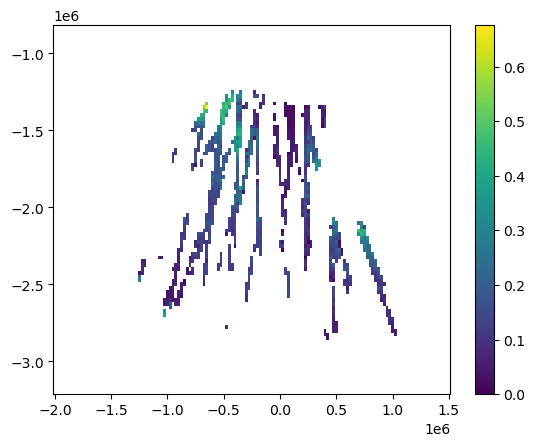

In [44]:
plt.pcolormesh(xx, yy, outputs[35, 1])
plt.colorbar()

In [47]:
ds = retrieve_hourly_ERA5(year, ['04'], ['10', '11'])

2024-07-23 10:11:15,144 INFO Welcome to the CDS
2024-07-23 10:11:15,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 10:11:15,757 INFO Request is completed


In [67]:
months = ['04']
days = ['10', '11']
c = cdsapi.Client(quiet=True, debug=False)
# dataset to read
dataset = 'reanalysis-era5-single-levels'
# flag to download data
# download_flag = False
variables = [
    '10m_u_component_of_wind', '10m_v_component_of_wind', 'instantaneous_10m_wind_gust',
    '2m_temperature', 'sea_ice_cover', 'surface_pressure'
]

params = {
    'format': 'netcdf',
    'product_type': 'reanalysis',
    'variable': variables,
    'year':[str(year)],
    'month': months,
    'day': days,
    'time': ['12:00'],
    'grid': [1, 0.5],
    'area': [-50, -180, -90, 180]
    }

# retrieves the path to the file
fl = c.retrieve(dataset, params)

2024-07-23 10:38:13,641 INFO Welcome to the CDS
2024-07-23 10:38:13,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-23 10:38:13,949 INFO Request is completed


In [50]:
import inspect

In [53]:
inspect.getargspec(c.retrieve)

ArgSpec(args=['self', 'name', 'request', 'target'], varargs=None, keywords=None, defaults=(None,))

In [4]:
filepath = "D:\\IS2_topo_DL"
region = "Ross"
year = 2019

##### Read data ##############################
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass

ncname = filepath + f'\\Ridges_density_{region}_{year}.nc'
ds = xr.open_dataset(ncname)

with netCDF4.Dataset(ncname, 'r') as nc:
    lat = np.array(nc.variables['lat'])
    lon = np.array(nc.variables['lon'])
    x = np.array(nc.variables['x'])
    y = np.array(nc.variables['y'])
    xx, yy = np.meshgrid(x, y)

    times = nc.variables['time']
    times = num2date(times[:], units = times.units)

    hours = np.array(nc.variables['time']).astype(float)
    time_era = []

    for i in range(0, len(hours)):
        time_era.append(dt.datetime(1800, 1, 1) + dt.timedelta(hours = hours[i]))

date1, date2 = [], []
for m in range(1, 13):
    date1.append(dt.datetime(year,m,1))
    if m == 12:
        date2.append(dt.datetime(year+1,1,1))
    else:
        date2.append(dt.datetime(year,m+1,1))

fields = ['fb_mode']
output = np.zeros([len(fields), len(date1), xx.shape[0], xx.shape[1]])

for k, field1 in enumerate(fields):
    for i in range(0, len(date1)):                

        tidx = np.where((times >= date1[i]) & (times < date2[i]))[0]
        fb_count = np.nansum(np.array(ds.variables["fb_count"][tidx, :, :]), axis = 0)
        valid_count = (fb_count > 500)
        
        if np.sum(tidx) > 0:
            array = np.array(ds.variables[field1][tidx, :, :])
            # array = np.transpose(np.array(ds.variables[field1][tidx, :, :]), axes = (0, 2, 1))
            data1 = np.nanmedian(array, axis = 0)
            data1[~valid_count] = np.nan

        output[k, i] = np.transpose(np.nanmean(array, axis = 0))
        

In [7]:
output.shape

(1, 12, 96, 141)

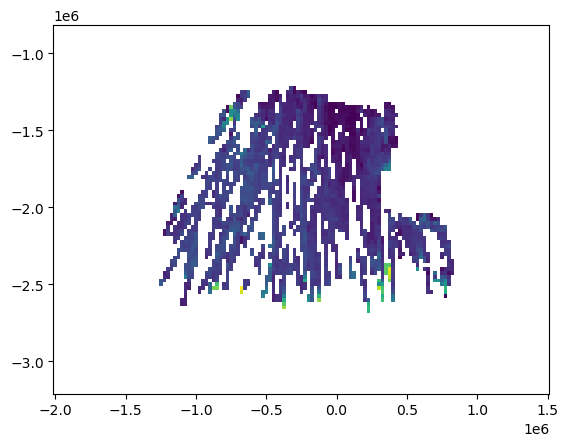

In [9]:
plt.pcolormesh(xx, yy, output[0, 4])

In [8]:
xx.shape

(96, 141)